# Data Preprocessing for Bike Sharing Demand Prediction

## 1. Importing necessary libraries

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

## 2. Loading the dataset

In [16]:
# Load the data from CSV file
df = pd.read_csv('/workspaces/mlops-zoomcamp/project/data/hour.csv')

In [17]:
# Display the first few rows
df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [18]:
# Display basic information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


## 3. Data Cleaning

In [19]:
# Check for missing values
print(df.isnull().sum())

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


## 4. Feature Engineering

In [20]:
# Convert datetime to pandas datetime object
df['dteday'] = pd.to_datetime(df['dteday'])

In [21]:
# Extract hour, day, month from datetime
df['day'] = df['dteday'].dt.day
df['month'] = df['dteday'].dt.month
df['year'] = df['dteday'].dt.year
df['dayofweek'] = df['dteday'].dt.dayofweek

In [23]:
# Convert season to categorical
df['season'] = df['season'].astype('category')

In [24]:
# Convert weather to categorical
df['weathersit'] = df['weathersit'].astype('category')

In [25]:
# Create a 'rush_hour' feature
df['rush_hour'] = ((df['hr'] >= 7) & (df['hr'] <= 9) | 
                   (df['hr'] >= 16) & (df['hr'] <= 19)).astype(int)

## Exploratory Data Analysis

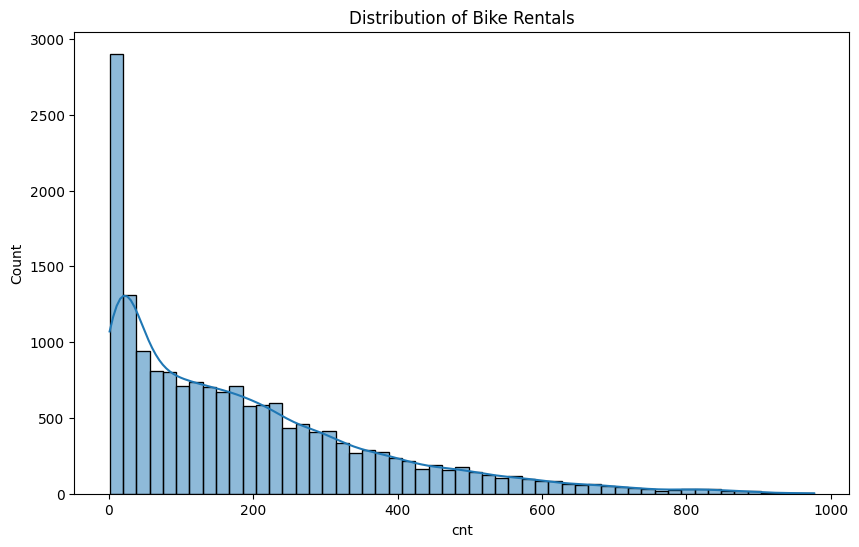

In [27]:
# Plot distribution of target variable (count)
plt.figure(figsize=(10,6))
sns.histplot(df['cnt'], kde=True)
plt.title('Distribution of Bike Rentals')
plt.show()

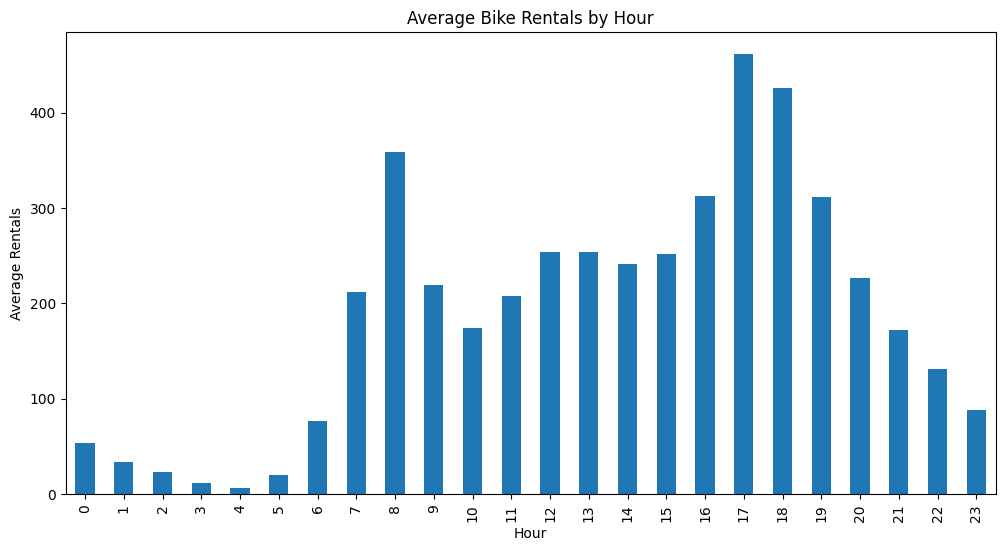

In [29]:
# Plot bike rentals by hour
hourly_rentals = df.groupby('hr')['cnt'].mean()
plt.figure(figsize=(12,6))
hourly_rentals.plot(kind='bar')
plt.title('Average Bike Rentals by Hour')
plt.xlabel('Hour')
plt.ylabel('Average Rentals')
plt.show()

## 5. Feature Selection

In [32]:
# Select features for model
features = ['season', 'holiday', 'workingday', 'weathersit', 'temp', 'atemp', 
            'hum', 'windspeed', 'hr', 'day', 'mnth', 'yr', 
            'dayofweek', 'rush_hour']

In [33]:
X = df[features]
y = df['cnt']

## Model Training

### Train-Test Split

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [37]:
print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)

Training set shape: (13903, 14)
Testing set shape: (3476, 14)


## Save Processed Data

In [38]:
# Convert X_train and X_test back to dataframes
X_train_df = pd.DataFrame(X_train, columns=X.columns)
X_test_df = pd.DataFrame(X_test, columns=X.columns)

In [40]:
# Save processed data
X_train_df.to_csv('/workspaces/mlops-zoomcamp/project/data/processed/X_train.csv', index=False)
X_test_df.to_csv('/workspaces/mlops-zoomcamp/project/data/processed/X_test.csv', index=False)
y_train.to_csv('/workspaces/mlops-zoomcamp/project/data/processed/y_train.csv', index=False)
y_test.to_csv('/workspaces/mlops-zoomcamp/project/data/processed/y_test.csv', index=False)


In [41]:
print("Processed data saved successfully!")

Processed data saved successfully!
